# Decision Tree

A Decision Tree is one of the popular and powerful machine learning algorithms that I have learned. It is a non-parametric supervised learning method that can be used for both classification and regression tasks. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. For a classification model, the target values are discrete in nature, whereas, for a regression model, the target values are represented by continuous values. Unlike the black box type of algorithms such as Neural Network, Decision Trees are comparably easier to understand because it shares internal decision-making logic (you will find details in the following session).

The more recent tree-based models, for example, Random forest (bagging method), gradient boosting (boosting method) and XGBoost (boosting method) are built on the top of decision tree algorithm. Therefore, the concepts and algorithms behind Decision Trees are strongly worth understanding!

There are *four* popular types of decision tree algorithms: 

1. **ID3**
2. **CART (Classification And Regression Trees)**
3. **Chi-Square**
4. **Reduction in Variance**

In this class, we'll focus only on the classification trees and the explanation of **ID3**.

**Example:**

>You play golf every Sunday and you invite your best friend, Arthur to come with you every time. Arthur sometimes comes to join but sometimes not. For him, it depends on a number of factors for example, **Weather**, **Temperature**, **Humidity** and **Wind**. We'll use the dataset of last two week to predict whether or not Arthur will join you to play golf. An intuitive way to do this is through a Decision Tree.

<div>
<img src="img/playgolf.png" width="500"/>
</div>

<div>
<img src="img/dt0.png" width="600"/>
</div>

* **Root Node:** 
    - The attribute that best classifies the training data, use this attribute at the root of the tree. 
    - The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets.
    
* **Splitting:** It is a process of dividing a node into two or more *sub-nodes*.

>**Question:** Base on which attribute (feature) to split? What is the best split?

>**Answer:** Use the attribute with the highest **Information Gain**

* **Decision Node:** This node decides whether/when a *sub-node* splits into further sub-nodes or not.

* **Leaf:** Terminal Node that predicts the outcome (categorical or continues value). The *coloured nodes*, i.e., *Yes* and *No* nodes, are the leaves.

## ID3 (Iterative Dichotomiser)

ID3 decision tree algorithm uses **Information Gain** to decide the splitting points. In order to measure how much information we gain, we can use **Entropy** to calculate the randomness/impurity/homogeneity of a sample.

>**Question:** What is **“Entropy”**? and What is its function?

>**Answer:** It is a measure of the amount of uncertainty in a data set. Entropy controls how a Decision Tree decides to split the data. It actually affects how a Decision Tree draws its boundaries.



We can summarize the ID3 algorithm as illustrated below:

1. Compute the entropy for data-set **Entropy(s)**
    - Calculate **Entropy** (Amount of uncertainity in dataset):
$$Entropy(S) = \frac{-p}{p+n}log_{2}(\frac{p}{p+n}) - \frac{n}{p+n}log_{2}(\frac{n}{p+n})$$
    
2. For every attribute/feature:
    - Calculate entropy for all other values **Entropy(A)**
             
    - Take **Average Information Entropy** for the current attribute
        - Calculate **Average Information**:
    $$I(Attribute) = \sum\frac{p_{i}+n_{i}}{p+n}Entropy(A)$$  
    
    - Calculate **Gain** for the current attribute
        - Calculate **Information Gain**: (Difference in Entropy before and after splitting dataset on attribute A)        
$$Gain = Entropy(S) - I(Attribute)$$

3. Pick the **Highest Gain Attribute**.
4. **Repeat** until we get the tree we desired.

### 1. Calculate the Entropy for dataset Entropy(s)

We need to calculate the entropy first. Decision column consists of 14 instances and includes two labels: **Yes** and **No**. There are 9 decisions labeled **Yes**, and 5 decisions labeled **No**.

<div>
<img src="img/ID3pg.png" width="500"/>
</div>

Calculate Entropy(S):

$$Entropy(S) = (Yes)log_{2}(Yes) - (No)log_{2}(No)$$

➡$$Entropy(S) = \frac{-p}{p+n}log_{2}(\frac{p}{p+n}) - \frac{n}{p+n}log_{2}(\frac{n}{p+n})$$

➡$$Entropy(S) = \frac{-9}{9+5}log_{2}(\frac{9}{9+5}) - \frac{5}{9+5}log_{2}(\frac{5}{9+5})$$

➡$$Entropy(S) = \frac{-9}{14}log_{2}(\frac{9}{14}) - \frac{5}{14}log_{2}(\frac{5}{14})$$

➡$$Entropy(S) = 0.940$$

### 2. Calculate Entropy for each Attribute of Dataset

### Entropy for each Attribute: (let say Outlook)

#### Calculate Entropy for each Values, i.e for 'Sunny', 'Rainy' and 'Overcast'.

| Outlook   | PlayGolf |   | Outlook   | PlayGolf |   | Outlook      | PlayGolf |
|:---------:|:--------:|:---:|:---------:|:--------:|:---:|:------------:|:--------:|
| **Sunny** | **No**❌ | \|  | **Rainy** | **Yes**✅| \|  | **Overcast** | **Yes**✅|
| **Sunny** | **No**❌ | \|  | **Rainy** | **Yes**✅| \|  | **Overcast** | **Yes**✅|
| **Sunny** | **No**❌ | \|  | **Rainy** | **No**❌ | \|  | **Overcast** | **Yes**✅|
| **Sunny** | **Yes**✅| \|  | **Rainy** | **Yes**✅| \|  | **Overcast** | **Yes**✅|
| **Sunny** | **Yes**✅| \|  | **Rainy** | **No**❌ | \|  |              |           |

1. Calculate Entropy(Outlook='Value'):

$$Entropy(S) = \frac{-p}{p+n}log_{2}(\frac{p}{p+n}) - \frac{n}{p+n}log_{2}(\frac{n}{p+n})$$

➡$$E(Outlook = Sunny) = \frac{-2}{5}log_{2}(\frac{2}{5}) - \frac{3}{5}log_{2}(\frac{3}{5}) = 0.971$$

➡$$E(Outlook = Rainy) = \frac{-3}{5}log_{2}(\frac{3}{5}) - \frac{2}{5}log_{2}(\frac{2}{5}) = 0.971$$

➡$$E(Outlook = Overcast) = -1 log_{2}(1) - 0 log_{2}(0) = 0$$

|    Outlook   | Yes = $p$ | No = $n$ | Entropy |
|:------------ |:-------:|:------:|:-------:|
| **Sunny**    |**2**    | **3**  | **0.971** |
| **Rainy**    |**3**    | **2**  | **0.971** |
| **Overcast** |**4**    | **0**  | **0**     |

2. Calculate Average Information Entropy(Outlook='Value'):

$$I(Outlook) = \frac{p_{Sunny}+n_{Sunny}}{p+n}Entropy(Outlook=Sunny) + $$
➡$$\frac{p_{Rainy}+n_{Rainy}}{p+n}Entropy(Outlook=Rainy) + $$
➡$$\frac{p_{Overcast}+n_{Overcast}}{p+n}Entropy(Outlook=Overcast)$$

➡$$I(Outlook) = \frac{3+2}{9+5}*(0.971) + \frac{2+3}{9+5}*(0.971) + \frac{4+0}{9+5}*(0)$$

$$I(Outlook) = 0.693$$

3. Calculate Gain: Outlook

$$Gain = Entropy(S) - I(Attribute)$$
➡$$Entropy(S) = 0.940$$

➡$$Gain(Outlook) = 0.940 - 0.693$$
➡$$Gain(Outlook) = 0.247$$

### Entropy for each Attribute: (let say Temperature))

#### Calculate Entropy for each Values, i.e for 'Hot', 'Mild' and 'Cool'.

| Temperature | PlayGolf |   | Temperature | PlayGolf |   | Temperature | PlayGolf |
|:-----------:|:--------:|:---:|:-----------:|:--------:|:---:|:-----------:|:--------:|
| **Hot** | **No**❌     | \|  | **Mild**  | **Yes**✅  | \|  | **Cool** | **Yes**✅  |
| **Hot** | **No**❌     | \|  | **Mild**  | **No**❌   | \|  | **Cool** | **No**❌   |
| **Hot** | **Yes**✅    | \|  | **Mild**  | **Yes**✅  | \|  | **Cool** | **Yes**✅  |
| **Hot** | **Yes**✅    | \|  | **Mild**  | **Yes**✅  | \|  | **Cool** | **Yes**✅  |
|         |               | \|  | **Mild**  | **Yes**✅  | \|  |          |          |
|         |               | \|  | **Mild**  | **No**❌   | \|  |          |          |

1. Calculate Entropy(Temperature='Value'):

$$Entropy(S) = \frac{-p}{p+n}log_{2}(\frac{p}{p+n}) - \frac{n}{p+n}log_{2}(\frac{n}{p+n})$$

➡$$E(Temperature = Hot) = \frac{-2}{4}log_{2}(\frac{2}{4}) - \frac{2}{6}log_{2}(\frac{2}{6}) = 1$$

➡$$E(Temperature = Mild) = \frac{-4}{6}log_{2}(\frac{4}{6}) - \frac{2}{6}log_{2}(\frac{2}{5}) = 0.918$$

➡$$E(Temperature = Cool) = \frac{-3}{4}log_{2}(\frac{-3}{4}) - \frac{-1}{4}log_{2}(\frac{-1}{4}) = 0.811$$

| Temperature | Yes = $p$ | No = $n$ | Entropy   |
|:------------|:---------:|:--------:|:---------:|
| **Hot**     | **2**     | **2**    | **1**     |
| **Mild**    | **4**     | **2**    | **0.918** |
| **Cool**    | **3**     | **1**    | **0.811** |

2. Calculate Average Information Entropy(Temperature='Value'):

$$I(Temperature) = \frac{p_{Hot}+n_{Hot}}{p+n}Entropy(Temperature=Hot) + $$
➡$$\frac{p_{Mild}+n_{Mild}}{p+n}Entropy(Temperature=Mild) + $$
➡$$\frac{p_{Cool}+n_{Cool}}{p+n}Entropy(Temperature=Cool)$$

➡$$I(Temperature) = \frac{2+2}{9+5}*(1) + \frac{4+2}{9+5}*(0.918) + \frac{3+1}{9+5}*(0.811)$$

➡$$I(Temperature) = 0.911$$

3. Calculate Gain: Temperature

$$Gain = Entropy(S) - I(Attribute)$$
➡$$Entropy(S) = 0.940$$

➡$$Gain(Temperature) = 0.940 - 0.911$$
➡$$Gain(Temperature) = 0.029$$

### Entropy for each Attribute: (let say Humidity))

#### Calculate Entropy for each Values, i.e for 'Normal' and 'High'.

| Humidity | PlayGolf |   | Humidity | PlayGolf | 
|:--------:|:--------:|:---:|:--------:|:--------:|
| **Normal** | **Yes**✅ | \|  | **High** | **No**❌  | 
| **Normal** | **No**❌  | \|  | **High** | **No**❌  | 
| **Normal** | **Yes**✅ | \|  | **High** | **Yes**✅ | 
| **Normal** | **Yes**✅ | \|  | **High** | **Yes**✅ | 
| **Normal** | **Yes**✅ | \|  | **High** | **No**❌  | 
| **Normal** | **Yes**✅ | \|  | **High** | **Yes**✅ | 
| **Normal** | **Yes**✅ | \|  | **High** | **No**❌  | 

1. Calculate Entropy(Humidity='Value'):

$$Entropy(S) = \frac{-p}{p+n}log_{2}(\frac{p}{p+n}) - \frac{n}{p+n}log_{2}(\frac{n}{p+n})$$

➡$$E(Humidity = Normal) = \frac{-3}{7}log_{2}(\frac{3}{7}) - \frac{4}{7}log_{2}(\frac{4}{7}) = 0.985$$

➡$$E(Humidity = High) = \frac{-6}{7}log_{2}(\frac{6}{7}) - \frac{1}{7}log_{2}(\frac{1}{7}) = 0.591$$


| Humidity   | Yes = $p$ | No = $n$ | Entropy   |
|:-----------|:---------:|:--------:|:---------:|
| **Normal** | **3**     | **4**    | **0.985** |
| **High**   | **6**     | **1**    | **0.591** |

2. Calculate Average Information Entropy(Humidity='Value'):

$$I(Humidity) = \frac{p_{Normal}+n_{Normal}}{p+n}Entropy(Humidity=Normal) + $$
➡$$\frac{p_{High}+n_{High}}{p+n}Entropy(Humidity=High)$$

➡$$I(Humidity) = \frac{3+4}{9+5}*(0.985) + \frac{6+1}{9+5}*(0.591) $$

➡$$I(Humidity) = 0.788$$

3. Calculate Gain: Humidity

$$Gain = Entropy(S) - I(Attribute)$$
➡$$Entropy(S) = 0.940$$

➡$$Gain(Humidity) = 0.940 - 0.788$$
➡$$Gain(Humidity) = 0.152$$

### Entropy for each Attribute: (let say Wind))

#### Calculate Entropy for each Values, i.e for 'Weak' and 'Strong'.

| Wind     | PlayGolf |   | Wind     | PlayGolf | 
|:--------:|:--------:|:---:|:--------:|:--------:|
| **Weak** | **No**❌  | \|  | **Strong** | **No**❌  | 
| **Weak** | **Yes**✅ | \|  | **Strong** | **No**❌  | 
| **Weak** | **Yes**✅ | \|  | **Strong** | **Yes**✅ | 
| **Weak** | **Yes**✅ | \|  | **Strong** | **Yes**✅ | 
| **Weak** | **No**❌  | \|  | **Strong** | **Yes**✅ | 
| **Weak** | **Yes**✅ | \|  | **Strong** | **No**❌  | 
| **Weak** | **Yes**✅ | \|  |            |         | 
| **Weak** | **Yes**✅ | \|  |            |         | 

1. Calculate Entropy(Wind='Value'):

$$Entropy(S) = \frac{-p}{p+n}log_{2}(\frac{p}{p+n}) - \frac{n}{p+n}log_{2}(\frac{n}{p+n})$$

➡$$E(Wind = Normal) = \frac{-6}{8}log_{2}(\frac{6}{8}) - \frac{2}{8}log_{2}(\frac{2}{8}) = 0.811$$

➡$$E(Wind = High) = \frac{-3}{6}log_{2}(\frac{3}{6}) - \frac{3}{6}log_{2}(\frac{3}{6}) = 1$$


| Wind    | Yes = $p$ | No = $n$ | Entropy   |
|:--------|:---------:|:--------:|:---------:|
| **Weak**   | **6**     | **2**    | **0.811** |
| **Strong** | **3**     | **3**    | **1**     |

2. Calculate Average Information Entropy(Wind='Value'):

$$I(Wind) = \frac{p_{Weak}+n_{Weak}}{p+n}Entropy(Wind=Weak) + $$
➡$$\frac{p_{Strong}+n_{Strong}}{p+n}Entropy(Wind=Strong)$$

➡$$I(Wind) = \frac{6+2}{9+5}*(0.811) + \frac{3+3}{9+5}*(1) $$

➡$$I(Wind) = 0.892$$

3. Calculate Gain: Wind

$$Gain = Entropy(S) - I(Attribute)$$
➡$$Entropy(S) = 0.940$$

➡$$Gain(Wind) = 0.940 - 0.892$$
➡$$Gain(Wind) = 0.048$$

### 3. Select Root Node of Dataset

Pick the highest Gain attribute.

|    Attributes   |    Gain   |           |
|:----------------|:---------:|:---------:|
| **Outlook**     | **0.247** | ⬅️ Root node|
| **Temperature** | **0.029** | |
| **Humidity**    | **0.152** | |
| **Wind**        | **0.048** | |

As seen, **Outlook** factor on decision produces the highest score. That's why, outlook decision will appear in the root node of the tree.

<div>
<img src="img/dt1.png" width="500"/>
</div>

### 4. Calculate Entropy for dataset when Outlook is Sunny

Now, we need to test dataset for custom subsets of Outlook attribute.

**Outlook = Overcast**

| Outlook | Temperature | Humidity | Windy | PlayGolf |          |
|:-------:|:-----------:|:--------:|:-----:|:--------:|:--------:|
| **Overcast** | **Hot**  | **High**   | **Weak**   | **Yes**  | ✅ |
| **Overcast** | **Cool** | **Normal** | **Strong** | **Yes**  | ✅ |
| **Overcast** | **Mild** | **High**   | **Weak**   | **Yes**  | ✅ |
| **Overcast** | **Hot**  | **Normal** | **Strong** | **Yes**  | ✅ |

Basically, decision will always be **Yes** if outlook were overcast.

<div>
<img src="img/dt2.png" width="600"/>
</div>

We'll apply same principles to those sub-trees till we get the tree.

Focus on the sub-trees for **Sunny** **Outlook**. We need to find the Gain scores for **Temperature**, **Humidity** and **Wind** attributes respectively.

**Outlook = Sunny**

| Outlook | Temperature | Humidity | Windy | PlayGolf |          |
|:-------:|:-----------:|:--------:|:-----:|:--------:|:--------:|
| **Sunny** | **Hot**  | **High**   | **Weak**   | **No**  | ❌ |
| **Sunny** | **Hot**  | **High**   | **Strong** | **No**  | ❌ | 
| **Sunny** | **Mild** | **High**   | **Weak**   | **No**  | ❌ | 
| **Sunny** | **Cool** | **Normal** | **Weak**   | **Yes** | ✅ | 
| **Sunny** | **Mild** | **Normal** | **Strong** | **Yes** | ✅ | 

$$p = 2, n = 3$$

Calculate Entropy(S):

$$Entropy(S) = (Yes)log_{2}(Yes) - (No)log_{3}(No)$$

➡$$Entropy(S) = \frac{-p}{p+n}log_{2}(\frac{p}{p+n}) - \frac{n}{p+n}log_{2}(\frac{n}{p+n})$$

➡$$Entropy(S) = \frac{-2}{2+3}log_{2}(\frac{2}{2+3}) - \frac{3}{2+3}log_{2}(\frac{3}{2+3})$$

➡$$Entropy(S) = 0.971$$

### 5. Calculate Entropy for each Attribute of Dataset when Outlook is Sunny

### Entropy for each Attribute: (let say Temperature) for Sunny Outlook

#### Calculate Entropy for each Temperature, i.e for Cool', 'Hot' and 'Mild' for Sunny Outlook.

| Outlook |  Temperature | PlayGolf |          |
|:-------:|--------:|--------:|:--------:|
| **Sunny** | **Cool** | **Yes** | ✅ |
| **Sunny** | **Hot**  | **No**  | ❌ | 
| **Sunny** | **Hot**  | **No**  | ❌ | 
| **Sunny** | **Mild** | **No**  | ❌ | 
| **Sunny** | **Mild** | **Yes** | ✅ |

| Temperature   | Yes = $p$ | No = $n$ | Entropy  |
|:--------|:---------:|:--------:|:--------:|
| **Cool** | **1**  | **0**    | **0**    |
| **Hot**  | **0**  | **2**    | **0**|
| **Mild** | **1**  | **1**    | **1**|

1. Calculate Average Information Entropy(Outlook=Sunny|Temperature):

$$I(Outlook=Sunny|Temperature) = 0.4$$

2. Calculate Gain(Outlook=Sunny|Temperature):

$$Gain(Outlook=Sunny|Temperature) = 0.571$$

### Entropy for each Attribute: (let say Humidity) for Sunny Outlook

#### Calculate Entropy for each Humidity, i.e for 'High' and 'Normal' for Sunny Outlook.

| Outlook |  Humidity | PlayGolf |          |
|:-------:|--------:|--------:|:--------:|
| **Sunny** | **High**   | **No**  | ❌ |
| **Sunny** | **High**   | **No**  | ❌ | 
| **Sunny** | **High**   | **No**  | ❌ | 
| **Sunny** | **Normal** | **Yes** | ✅ | 
| **Sunny** | **Normal** | **Yes** | ✅ |

| Humidity| Yes = $p$ | No = $n$ | Entropy |
|:--------|:---------:|:--------:|:-------:|
| **High**   | **0**  | **3**    | **0**   |
| **Normal** | **2**  | **0**    | **0**   |

1. Calculate Average Information Entropy(Outlook=Sunny|Humidity):

$$I(Outlook=Sunny|Humidity) = 0$$

2. Calculate Gain(Outlook=Sunny|Humidity):

$$Gain(Outlook=Sunny|Humidity) = 0.971$$

### Entropy for each Attribute: (let say Windy) for Sunny Outlook

#### Calculate Entropy for each Windy, i.e for 'Strong' and 'Weak' for Sunny Outlook.

| Outlook |  Wind  | PlayGolf |          |
|:-------:|--------:|--------:|:--------:|
| **Sunny** | **Strong** | **No**  | ❌ |
| **Sunny** | **Strong** | **Yes** | ✅ | 
| **Sunny** | **Weak**   | **No**  | ❌ | 
| **Sunny** | **Weak**   | **No**  | ❌ | 
| **Sunny** | **Weak**   | **Yes** | ✅ |

| Wind    | Yes = $p$ | No = $n$ | Entropy  |
|:--------|:---------:|:--------:|:--------:|
| **Strong** | **1**  | **1**    | **1**    |
| **Weak**   | **1**  | **2**    | **0.918**|

1. Calculate Average Information Entropy(Outlook=Sunny|Wind):

$$I(Outlook=Sunny|Windy) = 0.951$$

2. Calculate Gain(Outlook=Sunny|Wind):

$$Gain(Outlook=Sunny|Windy) = 0.020$$

### 6. Select Root Node of Dataset for Sunny Outlook

Pick the highest gain attribute.

|    Attributes   |    Gain   |           |
|:----------------|:---------:|:---------:|
| **Humidity**    | **0.971** | ⬅️ Root node|
| **Wind**        | **0.02** | |
| **Temperature** | **0.571** | |

As seen, **Humidity** factor on decision produces the highest score. That's why, **Humidity** decision will appear in the next node of the Sunny.

<div>
<img src="img/dt3.png" width="600"/>
</div>

### 7. Calculate Entropy for each Attribute of Dataset when Outlook is Rainy

Now, we need to focus on **Rainy** **Outlook**.

Focus on the sub-tree for **Rainy** **Outlook**. We need to find the Gain scores for **Temperature**, **Humidity** and **Wind** attributes respectively.

**Outlook = Rainy**

| Outlook | Temperature | Humidity | Wind  | PlayGolf |          |
|:-------:|:-----------:|:--------:|:-----:|:--------:|:--------:|
| **Rainy** | **Mild**  | **High**   | **Weak**   | **Yes** | ✅ |
| **Rainy** | **Cool**  | **Normal** | **Weak**   | **Yes** | ✅ |
| **Rainy** | **Cool**  | **Normal** | **Strong** | **No**  | ❌ |
| **Rainy** | **Mild**  | **Normal** | **Weak**   | **Yes** | ✅ |
| **Rainy** | **Mild**  | **High**   | **Strong** | **No**  | ❌ |

$$p = 3, n = 2$$

Calculate Entropy(S):

$$Entropy(S) = (Yes)log_{2}(Yes) - (No)log_{3}(No)$$

➡$$Entropy(S) = \frac{-p}{p+n}log_{2}(\frac{p}{p+n}) - \frac{n}{p+n}log_{2}(\frac{n}{p+n})$$

➡$$Entropy(S) = \frac{-3}{2+3}log_{2}(\frac{3}{2+3}) - \frac{2}{2+3}log_{2}(\frac{2}{2+3})$$

➡$$Entropy(S) = 0.971$$

### Entropy for each Attribute: (let say Temperature) for Sunny Rainy

#### Calculate Entropy for each Temperature, i.e for Cool', 'Hot' and 'Mild' for Sunny Rainy.

| Outlook |  Temperature | PlayGolf |          |
|:-------:|-------------:|---------:|:--------:|
| **Rainy** | **Mild** | **Yes** | ✅ |
| **Rainy** | **Cool** | **Yes** | ✅ | 
| **Rainy** | **Cool** | **No**  | ❌ | 
| **Rainy** | **Mild** | **Yes** | ✅ | 
| **Rainy** | **Mild** | **No**  | ❌ |

| Temperature | Yes = $p$ | No = $n$ | Entropy  |
|:------------|:---------:|:--------:|:--------:|
| **Cool**  | **1**  | **1**    | **1**    |
| **Mild**  | **2**  | **1**    | **0.918**|

1. Calculate Average Information Entropy(Outlook=Rainy|Temperature):

$$I(Outlook=Rainy|Temperature) = 0.951$$

2. Calculate Gain(Outlook=Rainy|Temperature):

$$Gain(Outlook=Rainy|Temperature) = 0.02$$

### Entropy for each Attribute: (let say Humidity) for Sunny Rainy

#### Calculate Entropy for each Humidity, i.e for 'High' and 'Normal' for Sunny Rainy.

| Outlook |  Humidity | PlayGolf |          |
|:-------:|----------:|---------:|:--------:|
| **Rainy** | **High**   | **Yes** | ✅ |
| **Rainy** | **High**   | **No**  | ❌ | 
| **Rainy** | **Normal** | **Yes** | ✅ | 
| **Rainy** | **Normal** | **No**  | ❌ | 
| **Rainy** | **Normal** | **Yes** | ✅ |

| Humidity| Yes = $p$ | No = $n$ | Entropy |
|:--------|:---------:|:--------:|:-------:|
| **High**   | **1**  | **1**    | **1**   |
| **Normal** | **2**  | **1**    | **0.918**   |

1. Calculate Average Information Entropy(Outlook=Rainy|Humidity):

$$I(Outlook=Rainy|Humidity) = 0.951$$

2. Calculate Gain(Outlook=Rainy|Humidity):

$$Gain(Outlook=Rainy|Humidity)= 0.02$$

### Entropy for each Attribute: (let say Windy)  for Sunny Rainy

#### Calculate Entropy for each Windy, i.e for 'Strong' and 'Weak'  for Sunny Rainy.

| Outlook |  Wind   | PlayGolf |          |
|:-------:|--------:|---------:|:--------:|
| **Rainy** | **Strong** | **No**  | ❌ |
| **Rainy** | **Strong** | **No**  | ❌ | 
| **Rainy** | **Weak**   | **Yes** | ✅ | 
| **Rainy** | **Weak**   | **Yes** | ✅ | 
| **Rainy** | **Weak**   | **Yes** | ✅ |

| Wind    | Yes = $p$ | No = $n$ | Entropy  |
|:--------|:---------:|:--------:|:--------:|
| **Strong** | **0**  | **2**    | **0**    |
| **Weak**   | **3**  | **0**    | **0**|

1. Calculate Average Information Entropy(Outlook=Rainy|Wind):

$$I(Outlook=Rainy|Windy) = 0$$

2. Calculate Gain(Outlook=Rainy|Wind):

$$Gain(Outlook=Rainy|Windy) = 0.971$$

### 8. Select Root Node of Dataset for Rainy Outlook

Pick the highest gain attribute.

|    Attributes   |    Gain   |           |
|:----------------|:---------:|:---------:|
| **Humidity**    | **0.02**  | |
| **Windy**       | **0.971** | ⬅️ Root node|
| **Temperature** | **0.02**  | |

As seen, **Wind** factor on decision produces the highest score. That's why, **Wind** decision will appear in the next node of the Rainy.

<div>
<img src="img/dt.png" width="600"/>
</div>

## So, decision tree construction is over. We can use the following rules for decisioning.

## Building a Decision Tree 

Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

In [1]:
# Importing the necessary module!

import numpy as np
import pandas as pd

In [2]:
# Importing data

df = pd.read_csv("playgolf_data.csv")
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [3]:
df.dtypes

Outlook        object
Temperature    object
Humidity       object
Wind           object
PlayGolf       object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   PlayGolf     14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


In [5]:
# Converting categorical variables into dummies/indicator variables

df_getdummy=pd.get_dummies(data=df, columns=['Temperature', 'Humidity', 'Outlook', 'Wind'],dtype='int')
df_getdummy

,PlayGolf,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Wind_Strong,Wind_Weak
0,No,0,1,0,1,0,0,0,1,0,1
1,No,0,1,0,1,0,0,0,1,1,0
2,Yes,0,1,0,1,0,1,0,0,0,1
3,Yes,0,0,1,1,0,0,1,0,0,1
4,Yes,1,0,0,0,1,0,1,0,0,1
5,No,1,0,0,0,1,0,1,0,1,0
6,Yes,1,0,0,0,1,1,0,0,1,0
7,No,0,0,1,1,0,0,0,1,0,1
8,Yes,1,0,0,0,1,0,0,1,0,1
9,Yes,0,0,1,0,1,0,1,0,0,1


In [6]:
# Separating the training set and test set

from sklearn.model_selection import train_test_split

X = df_getdummy.drop('PlayGolf',axis=1)
y = df_getdummy['PlayGolf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [7]:
# importing Decision Tree Classifier via sklean

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy',max_depth=8)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

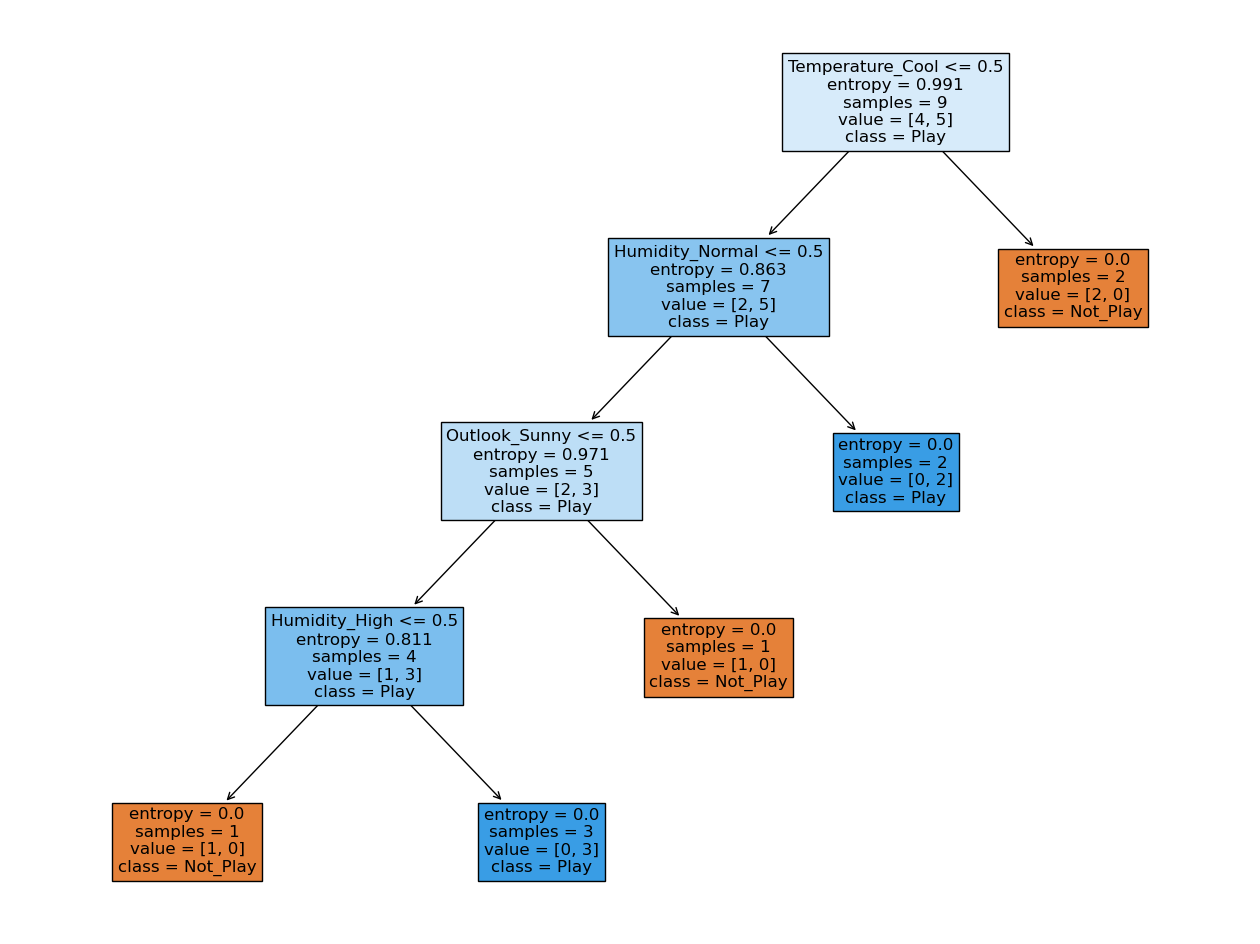

In [8]:
# visualising the decision tree diagram

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=df_getdummy.columns, fontsize=12, filled=True, 
              class_names=['Not_Play', 'Play'])

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.20      1.00      0.33         1
         Yes       0.00      0.00      0.00         4

    accuracy                           0.20         5
   macro avg       0.10      0.50      0.17         5
weighted avg       0.04      0.20      0.07         5



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In order to improve the model performance (Hyperparameters Optimization), you should adjust the hyperparameters. 

**The major disadvantage of Decision Trees is overfitting, especially when a tree is particularly deep.**

Fortunately, the more recent tree-based models including random forest  are built on the top of 

decision tree algorithm and they generally perform better with a strong modeling technique and much more dynamic 

than a single decision tree. Therefore, understanding the concepts and algorithms behind Decision Trees thoroughly 

is super helpful to construct a good foundation of learning data science and machine learning.